In [18]:
import os
import sys
import torch
import json
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from caption import caption_image_beam_search, visualize_att


### Parameters

In [20]:
model = '../models/flickr8k/BEST_checkpoint_bs80_ad300_dd300_elr0.0_dlr0.0004.pth.tar'
img_path = '../data/datasets/flickr8k/img/3758787457_1a903ee1e9.jpg'
word_map_path = '../data/datasets/flickr8k/WORDMAP_flickr8k.json'
smooth = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Load model

In [ ]:
checkpoint = torch.load(model, map_location=str(device))
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

### Load word map, create inverse word map

In [10]:
with open(word_map_path, 'r') as j:
    word_map = json.load(j)
rev_word_map = {v: k for k, v in word_map.items()} 

### Encode, decode with attention and beam search

In [13]:
seq, alphas = caption_image_beam_search(encoder, decoder, img_path, word_map, 1)
alphas = torch.FloatTensor(alphas)

/home/pabvald/.local/share/virtualenvs/instagram-caption-generator-Z18861q1/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


### Visualize caption and attention of best sequence

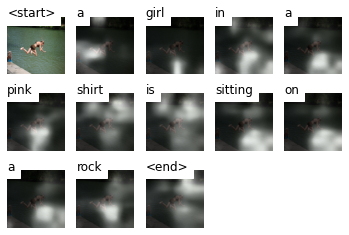

In [21]:
visualize_att(img_path, seq, alphas, rev_word_map, smooth)